<a href="https://colab.research.google.com/github/InezaRW/InezaRW/blob/main/Rainfall_Predicting_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used Libraries in Predicting Rainfall

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

#Dataset to be used in this work

In [6]:
Data = '/content/cleaned_docucam_data.csv'
df = pd.read_csv(Data)
pd.set_option("display.max_columns", None)
print(df.head())

                      TimeStamp       TimeStamp.1        Date     Time  \
0  2022-10-14T10:32:50.6761662Z  10/14/2022 10:32  10/14/2022  32:51.0   
1  2022-10-14T10:34:00.0000000Z  10/14/2022 10:34  10/14/2022  34:00.0   
2  2022-10-14T10:36:00.0000000Z           36:00.0  10/14/2022  36:00.0   
3  2022-10-14T10:38:00.0000000Z           38:00.0  10/14/2022  38:00.0   
4  2022-10-14T10:40:00.0000000Z           40:00.0  10/14/2022  40:00.0   

          Ticks  ACTUAL_TEMPERATURE  HUMIDITY  ILLUMINATION  RAIN_COUNTER  \
0  6.380000e+17                20.6      52.0      100000.0         248.4   
1  6.380000e+17                20.8      52.0      100000.0         248.4   
2  6.380000e+17                20.8      52.0      100000.0         248.4   
3  6.380000e+17                21.0      52.0      100000.0         248.4   
4  6.380000e+17                20.5      51.0      100000.0         248.4   

   SUNSHINEDURATION  WIND_SPEED  
0            8970.0        22.5  
1            8972.0     

# Feature count description

In [7]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique()) < 25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count: {}".format(len(numerical_feature)))
print("Discrete Feature Count: {}".format(len(discrete_feature)))
print("Continuous Feature Count: {}".format(len(continuous_feature)))
print("Categorical Feature Count: {}".format(len(categorical_feature)))

Numerical Features Count: 7
Discrete Feature Count: 1
Continuous Feature Count: 6
Categorical Feature Count: 4


# Handle Missing Values

In [8]:
df.isnull().sum()*100/len(df)

TimeStamp             0.000000
TimeStamp.1           0.000000
Date                  0.000000
Time                  0.000000
Ticks                 0.000000
ACTUAL_TEMPERATURE    0.013940
HUMIDITY              0.013940
ILLUMINATION          0.013940
RAIN_COUNTER          0.013940
SUNSHINEDURATION      0.013940
WIND_SPEED            0.014457
dtype: float64

In [9]:
print(numerical_feature)

['Ticks', 'ACTUAL_TEMPERATURE', 'HUMIDITY', 'ILLUMINATION', 'RAIN_COUNTER', 'SUNSHINEDURATION', 'WIND_SPEED']


In [11]:
# Cleaning by imputation the mean
df['ACTUAL_TEMPERATURE'].fillna(df['ACTUAL_TEMPERATURE'].mean(), inplace=True)
df['HUMIDITY'].fillna(df['HUMIDITY'].mean(), inplace=True)
df['ILLUMINATION'].fillna(df['ILLUMINATION'].mean(), inplace=True)
df['RAIN_COUNTER'].fillna(df['RAIN_COUNTER'].mean(), inplace=True)
df['SUNSHINEDURATION'].fillna(df['SUNSHINEDURATION'].mean(), inplace=True)
df['WIND_SPEED'].fillna(df['WIND_SPEED'].mean(), inplace=True)


In [12]:
df.describe()

,Ticks,ACTUAL_TEMPERATURE,HUMIDITY,ILLUMINATION,RAIN_COUNTER,SUNSHINEDURATION,WIND_SPEED
count,1.936830e+05,193683.000000,193683.000000,193683.000000,193683.000000,193683.000000,193683.000000
mean,6.380000e+17,15.590714,74.740803,7067.270379,812.262140,8191.530146,7.406501
std,0.000000e+00,2.592285,12.708089,20210.988094,260.255975,4709.385532,8.287174
min,6.380000e+17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.380000e+17,13.800000,67.000000,0.000000,659.300000,4035.000000,0.000000
50%,6.380000e+17,15.100000,76.000000,95.600000,818.000000,8309.000000,6.200000
75%,6.380000e+17,17.400000,84.000000,5664.500000,1079.400000,12208.000000,12.200000
max,6.380000e+17,24.600000,97.000000,100000.000000,1123.700000,16383.000000,69.200000


In [13]:
df.isnull().sum()*100/len(df)

TimeStamp             0.0
TimeStamp.1           0.0
Date                  0.0
Time                  0.0
Ticks                 0.0
ACTUAL_TEMPERATURE    0.0
HUMIDITY              0.0
ILLUMINATION          0.0
RAIN_COUNTER          0.0
SUNSHINEDURATION      0.0
WIND_SPEED            0.0
dtype: float64

In [15]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [16]:
df

,TimeStamp,TimeStamp.1,Date,Time,Ticks,ACTUAL_TEMPERATURE,HUMIDITY,ILLUMINATION,RAIN_COUNTER,SUNSHINEDURATION,WIND_SPEED
0,2022-10-14T10:32:50.6761662Z,10/14/2022 10:32,10/14/2022,32:51.0,6.380000e+17,20.6,52.0,100000.0,248.4,8970.0,22.500000
1,2022-10-14T10:34:00.0000000Z,10/14/2022 10:34,10/14/2022,34:00.0,6.380000e+17,20.8,52.0,100000.0,248.4,8972.0,22.500000
2,2022-10-14T10:36:00.0000000Z,36:00.0,10/14/2022,36:00.0,6.380000e+17,20.8,52.0,100000.0,248.4,8972.0,22.500000
3,2022-10-14T10:38:00.0000000Z,38:00.0,10/14/2022,38:00.0,6.380000e+17,21.0,52.0,100000.0,248.4,8975.0,25.700000
4,2022-10-14T10:40:00.0000000Z,40:00.0,10/14/2022,40:00.0,6.380000e+17,20.5,51.0,100000.0,248.4,8977.0,19.700000
...,...,...,...,...,...,...,...,...,...,...,...
193678,2023-07-14T01:44:00.0000000Z,7/14/2023 1:44,7/14/2023,44:00.0,6.380000e+17,13.0,77.0,0.0,1123.7,13219.0,0.000000
193679,2023-07-14T01:46:00.0000000Z,7/14/2023 1:46,7/14/2023,46:00.0,6.380000e+17,13.0,77.0,0.0,1123.7,13219.0,0.000000
193680,2023-07-14T01:48:00.0000000Z,7/14/2023 1:48,7/14/2023,48:00.0,6.380000e+17,13.0,77.0,0.0,1123.7,13219.0,0.000000
193681,2023-07-14T01:50:00.0000000Z,7/14/2023 1:50,7/14/2023,50:00.0,6.380000e+17,12.9,77.0,0.0,1123.7,13219.0,0.000000


<ipython-input-20-2217aaf02662>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr(method = "spearman")


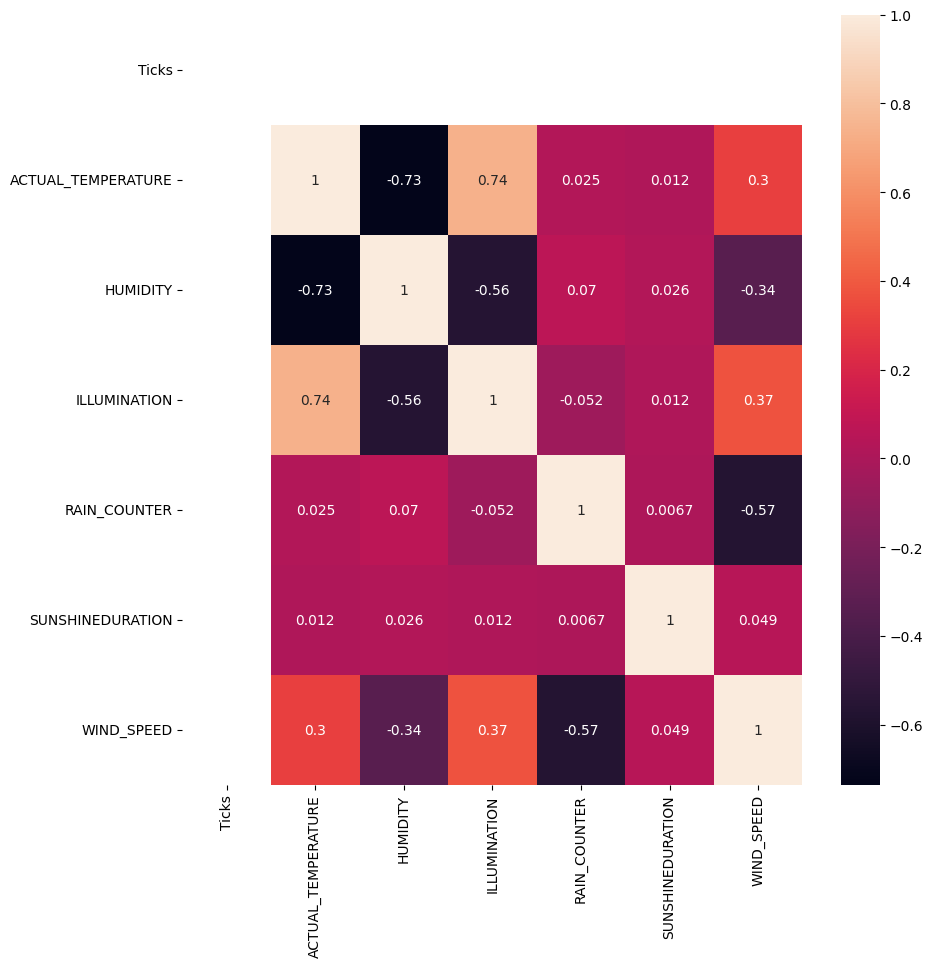

In [20]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

#Correlation and creating heatmap

<ipython-input-23-74d2bcb7bf19>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr(method='spearman')


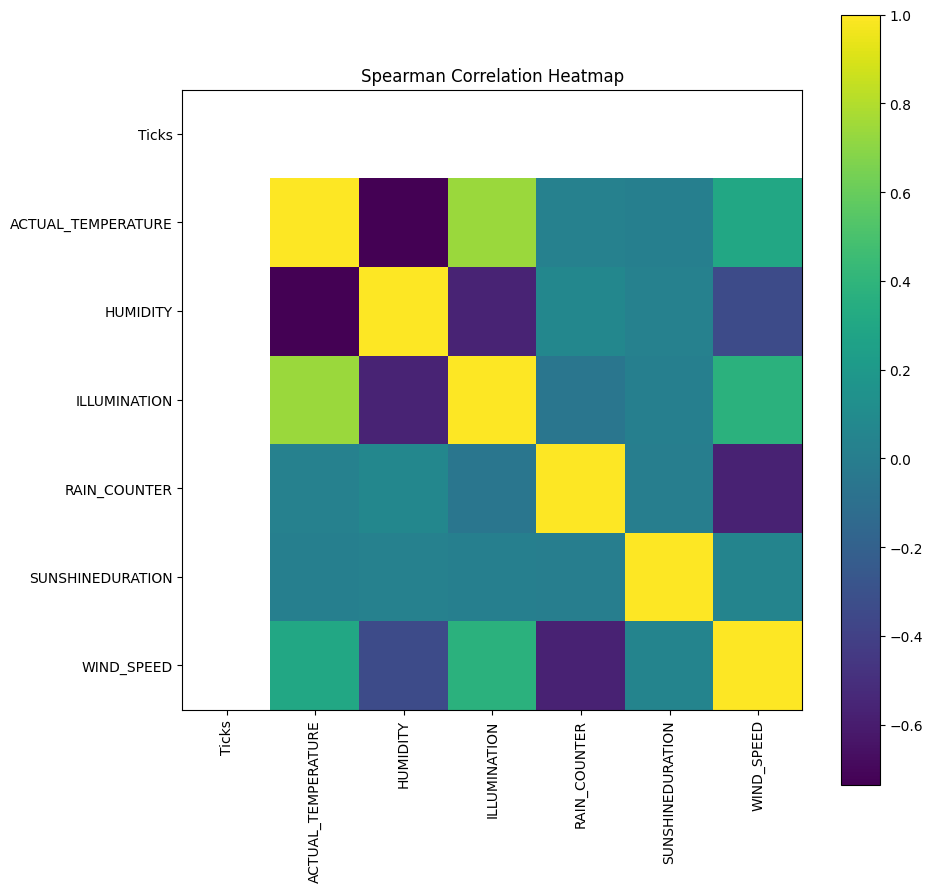

In [23]:
corrmat = df.corr(method='spearman')
plt.figure(figsize=(10, 10))
plt.imshow(corrmat, cmap='viridis', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrmat.columns)), corrmat.columns, rotation=90)
plt.yticks(range(len(corrmat.columns)), corrmat.columns)
plt.title('Spearman Correlation Heatmap')
plt.show()

#Creating series of density plots (histograms) to evaluate continous features in Dataframe

<ipython-input-24-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


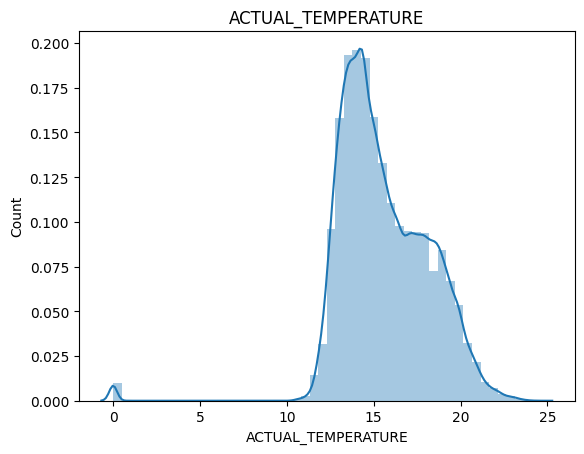

<Figure size 1500x1500 with 0 Axes>

<ipython-input-24-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


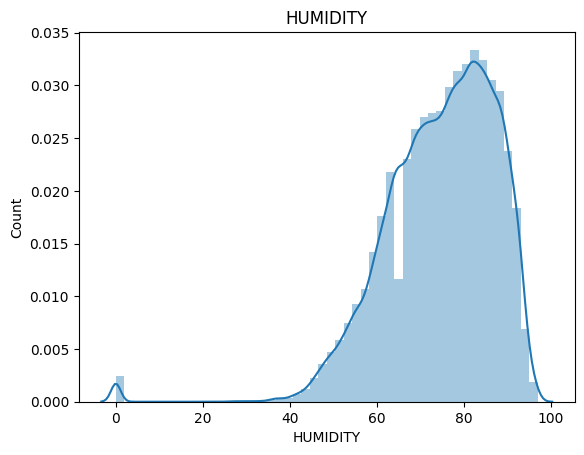

<Figure size 1500x1500 with 0 Axes>

<ipython-input-24-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


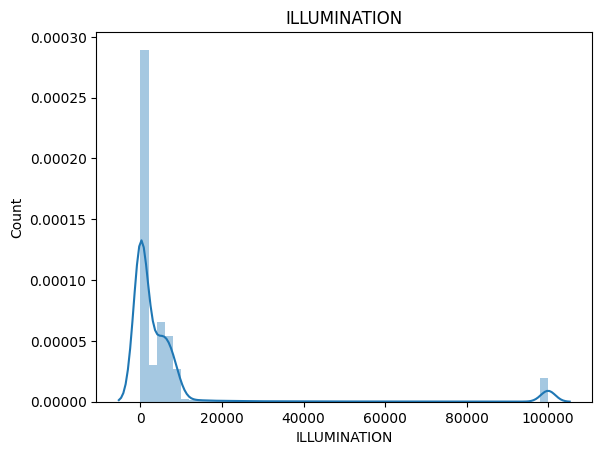

<Figure size 1500x1500 with 0 Axes>

<ipython-input-24-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


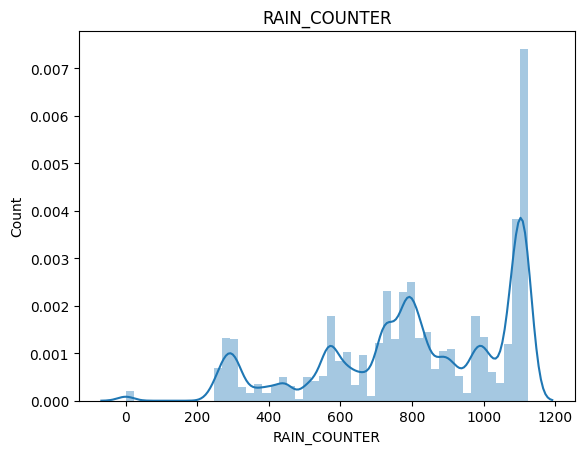

<Figure size 1500x1500 with 0 Axes>

<ipython-input-24-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


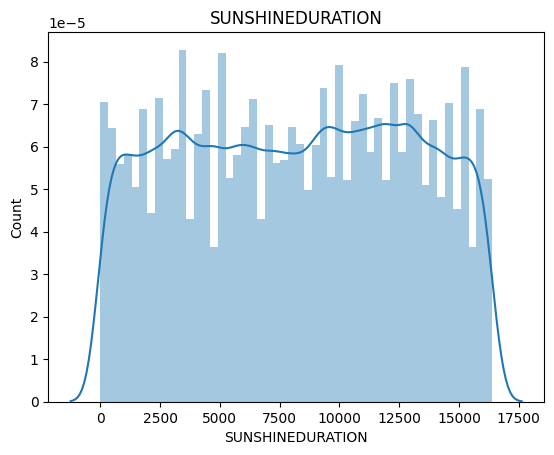

<Figure size 1500x1500 with 0 Axes>

<ipython-input-24-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


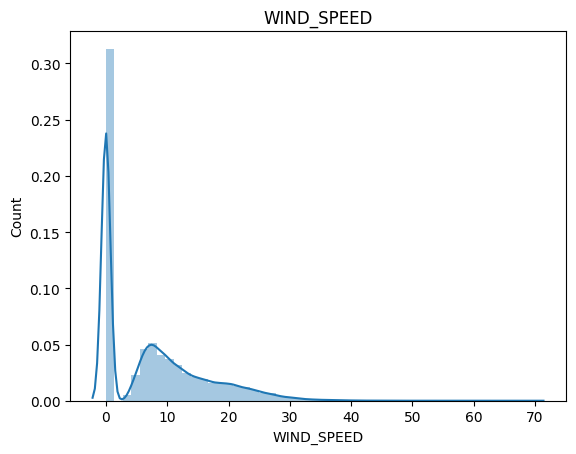

<Figure size 1500x1500 with 0 Axes>

In [24]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

#A for loop is used to plot a boxplot for all the continuous features to see the outliers

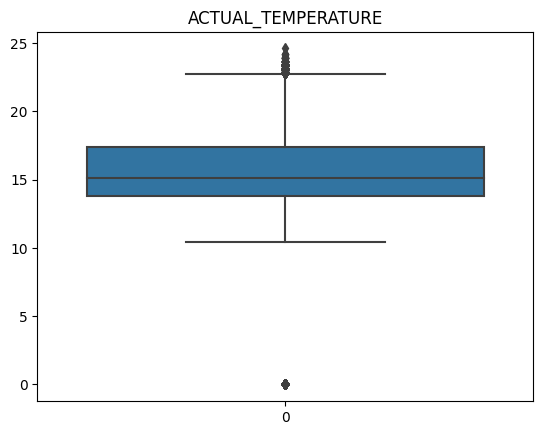

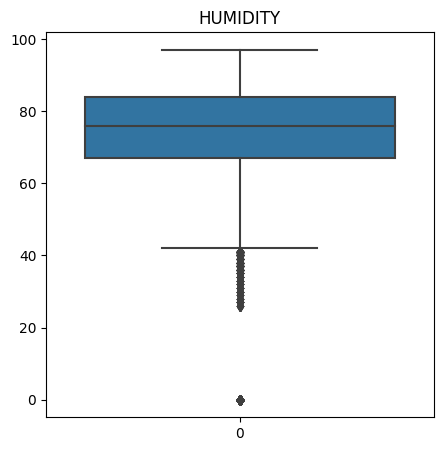

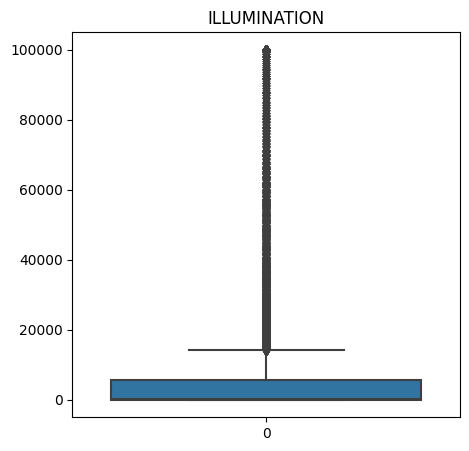

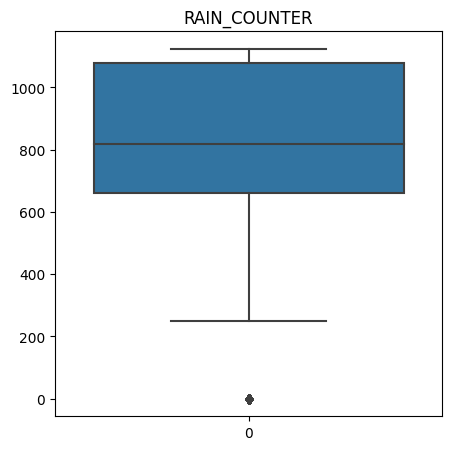

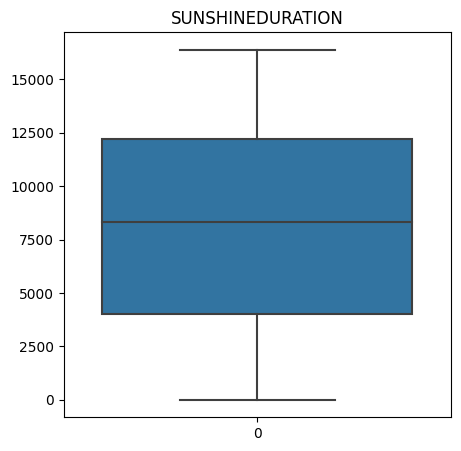

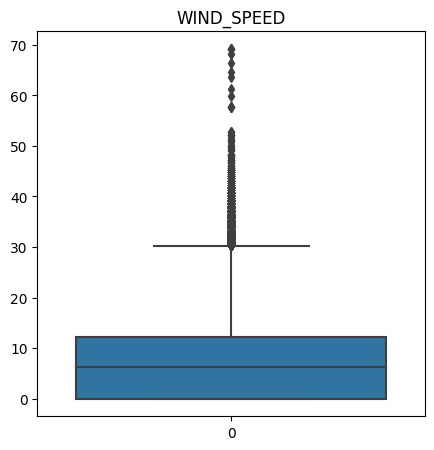

<Figure size 500x500 with 0 Axes>

In [25]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(5,5))

In [26]:
for feature in continuous_feature:
    print(feature)

ACTUAL_TEMPERATURE
HUMIDITY
ILLUMINATION
RAIN_COUNTER
SUNSHINEDURATION
WIND_SPEED


#Upper and lower bound

In [28]:
features_to_process = ['Ticks', 'ACTUAL_TEMPERATURE', 'HUMIDITY', 'ILLUMINATION', 'RAIN_COUNTER', 'SUNSHINEDURATION', 'WIND_SPEED']

for feature in features_to_process:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)

    lower_bridge = df[feature].quantile(0.25) - (IQR * 1.5)
    upper_bridge = df[feature].quantile(0.75) + (IQR * 1.5)

    print(f"For {feature}:")
    print(f"Lower Bridge: {lower_bridge}")
    print(f"Upper Bridge: {upper_bridge}\n")


For Ticks:
Lower Bridge: 6.38e+17
Upper Bridge: 6.38e+17

For ACTUAL_TEMPERATURE:
Lower Bridge: 8.400000000000004
Upper Bridge: 22.799999999999997

For HUMIDITY:
Lower Bridge: 41.5
Upper Bridge: 109.5

For ILLUMINATION:
Lower Bridge: -8496.75
Upper Bridge: 14161.25

For RAIN_COUNTER:
Lower Bridge: 29.14999999999975
Upper Bridge: 1709.5500000000002

For SUNSHINEDURATION:
Lower Bridge: -8224.5
Upper Bridge: 24467.5

For WIND_SPEED:
Lower Bridge: -18.299999999999997
Upper Bridge: 30.499999999999996



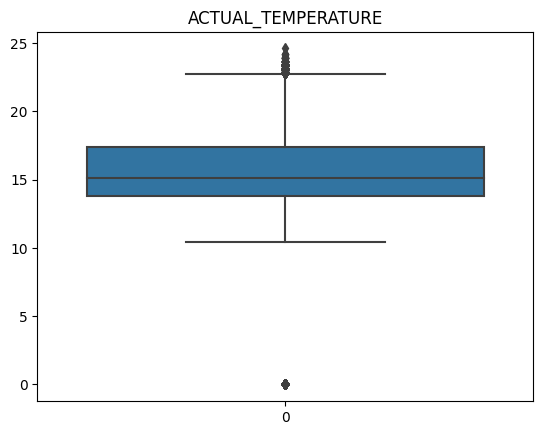

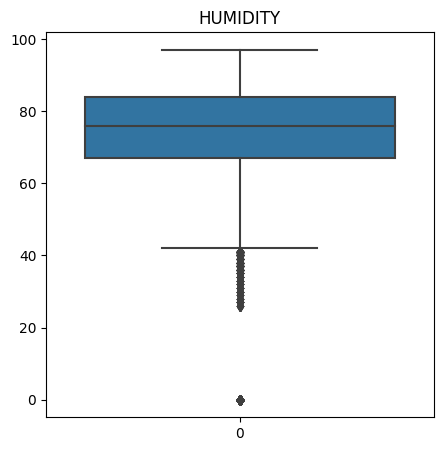

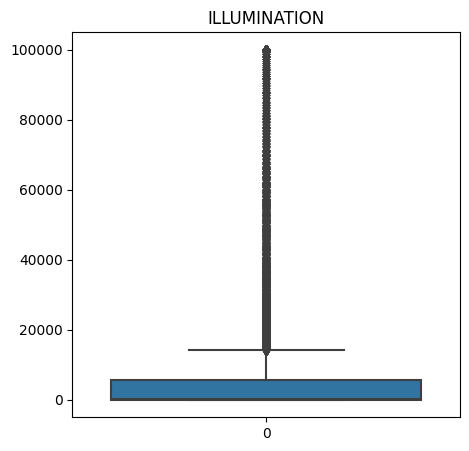

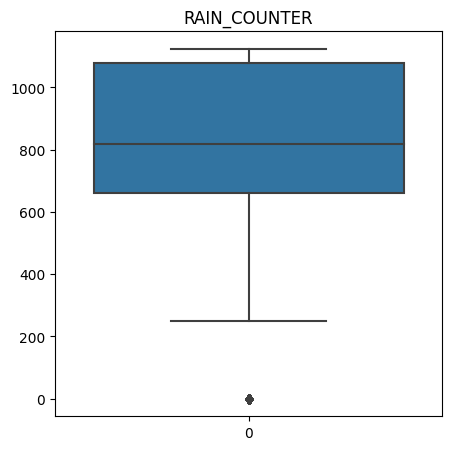

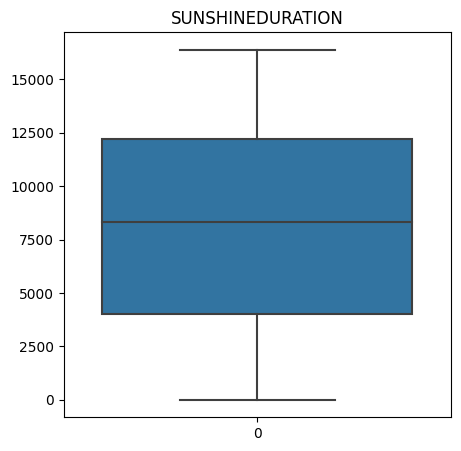

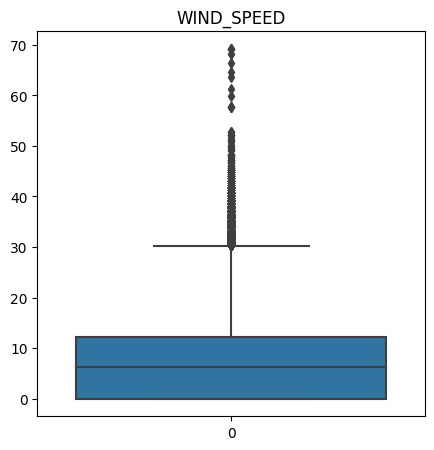

<Figure size 500x500 with 0 Axes>

In [29]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(5,5))

In [31]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

ACTUAL_TEMPERATURE


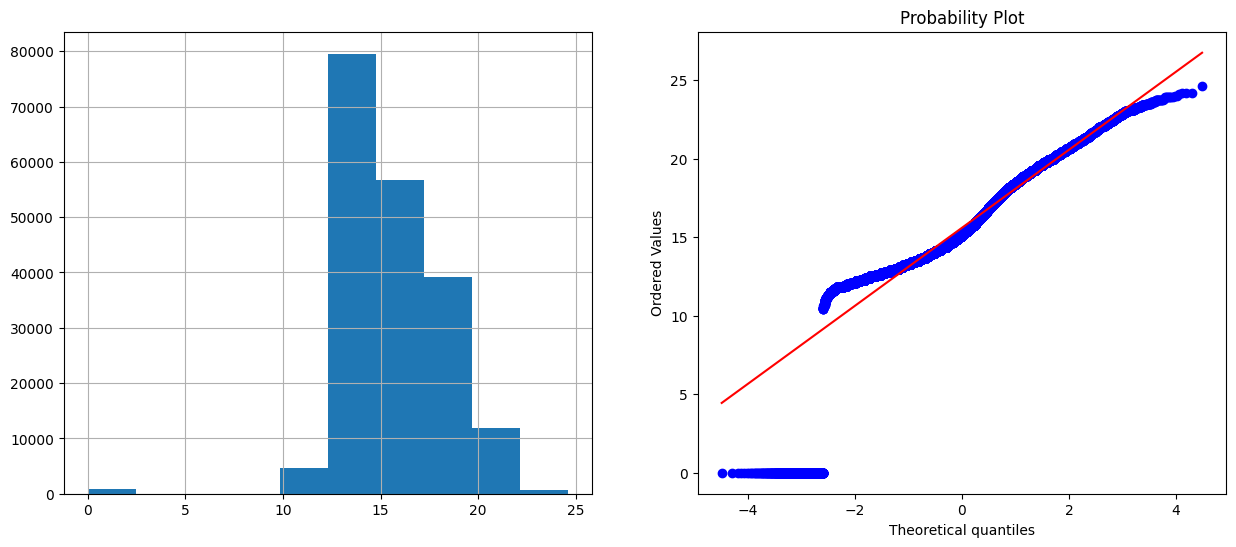

HUMIDITY


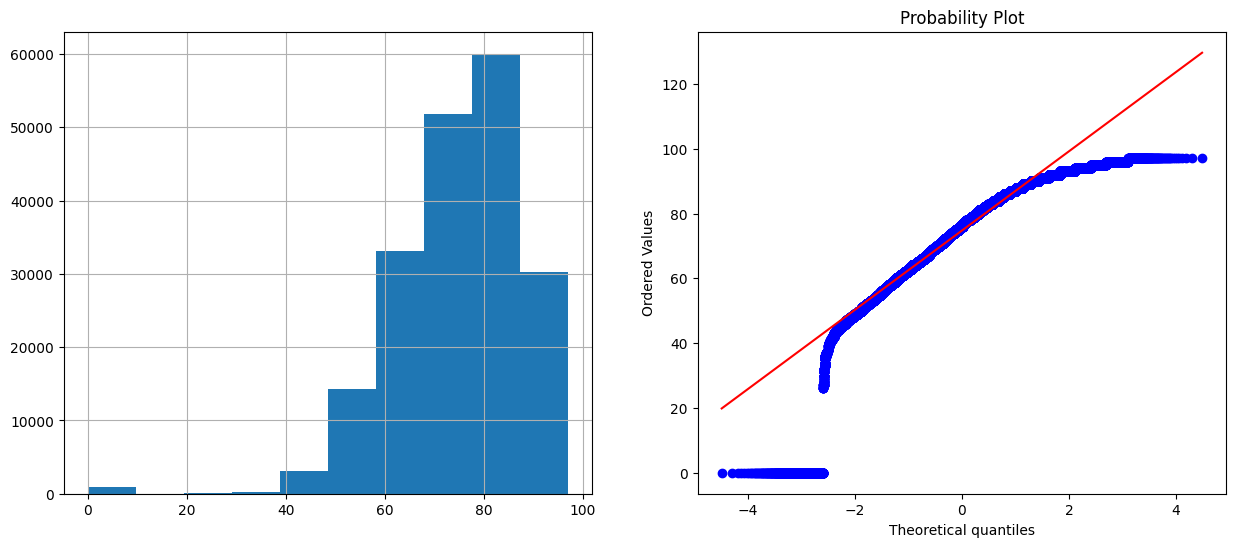

ILLUMINATION


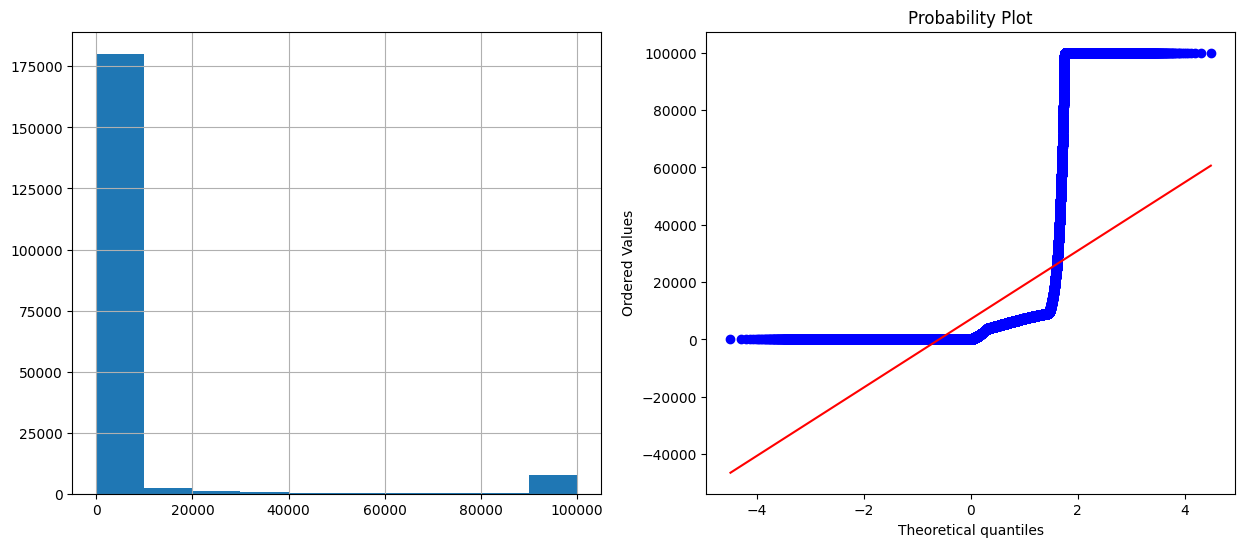

RAIN_COUNTER


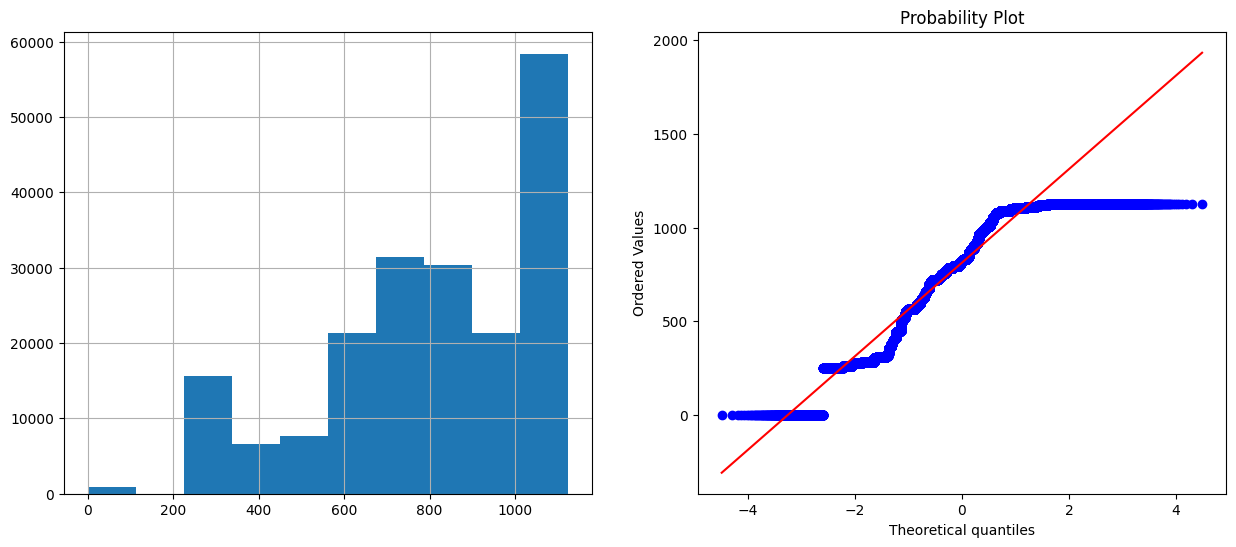

SUNSHINEDURATION


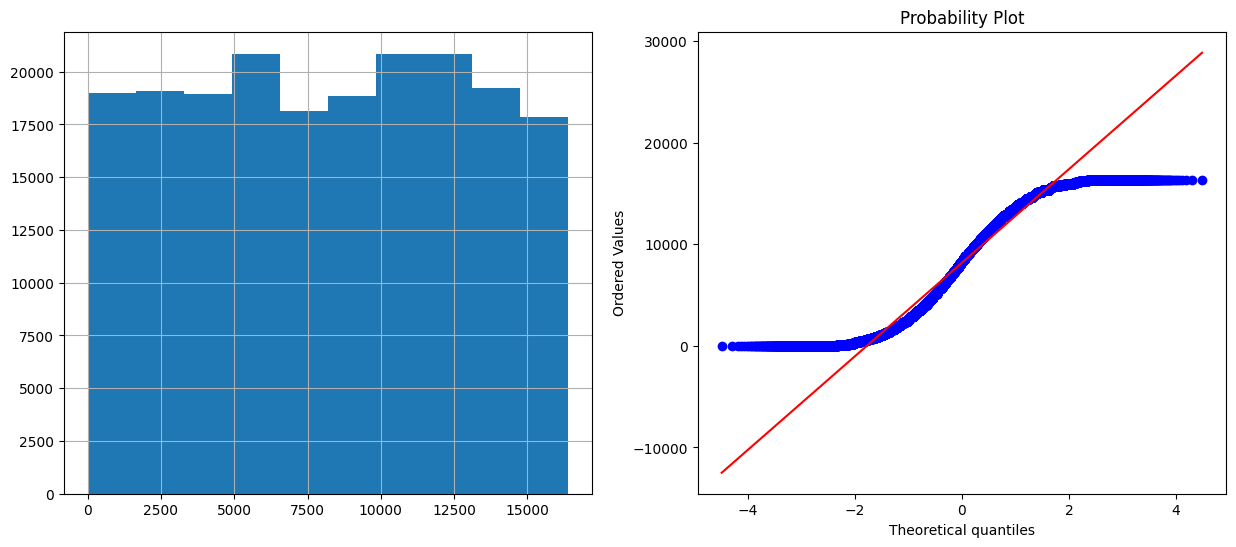

WIND_SPEED


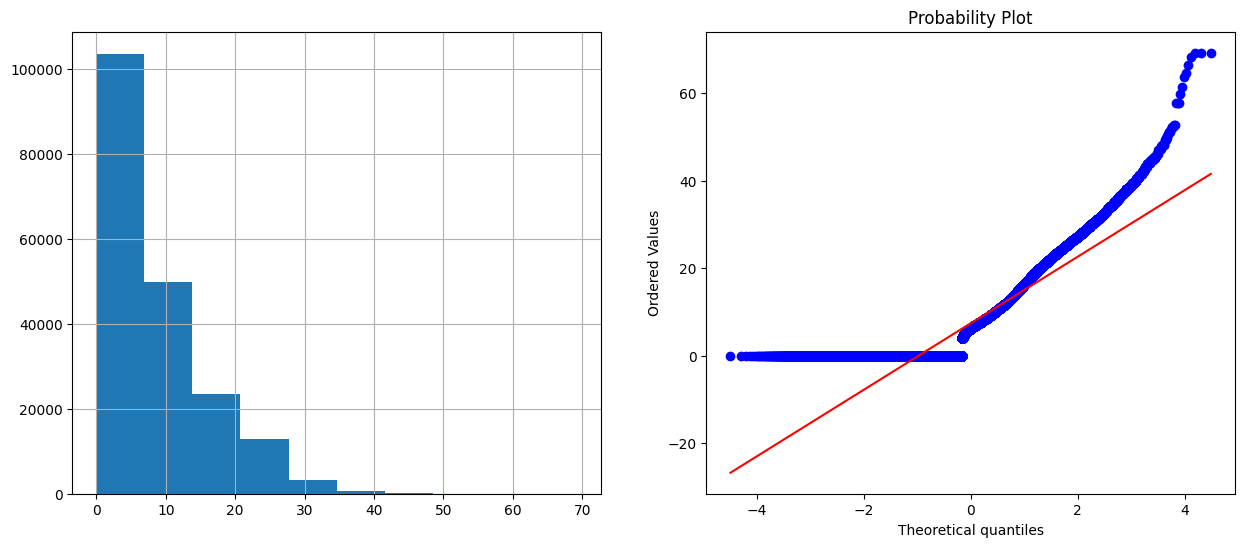

In [32]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

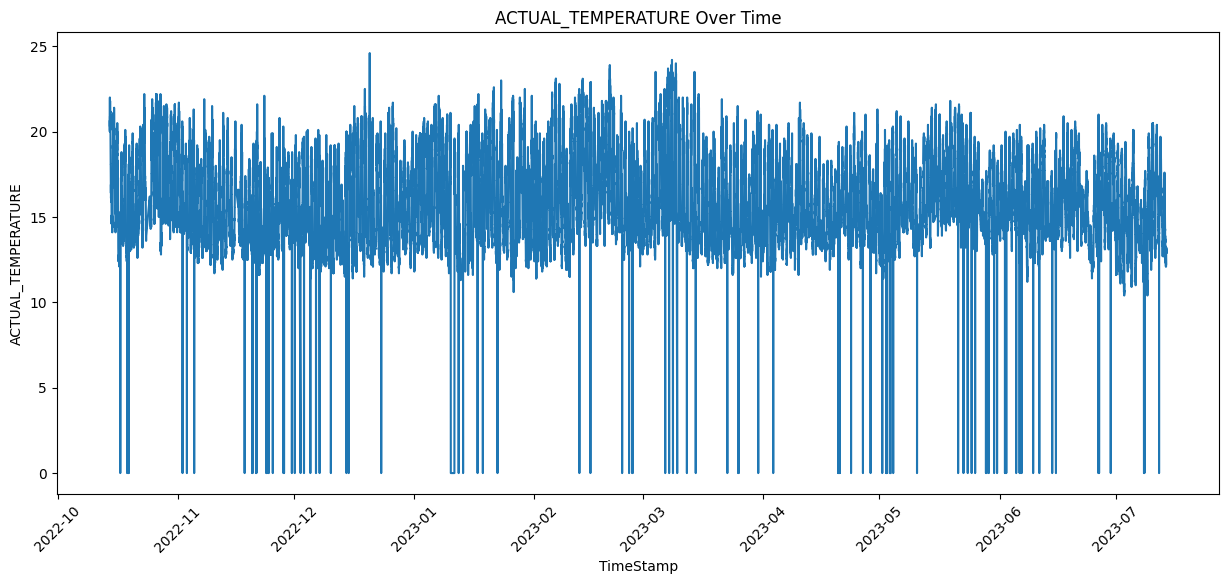

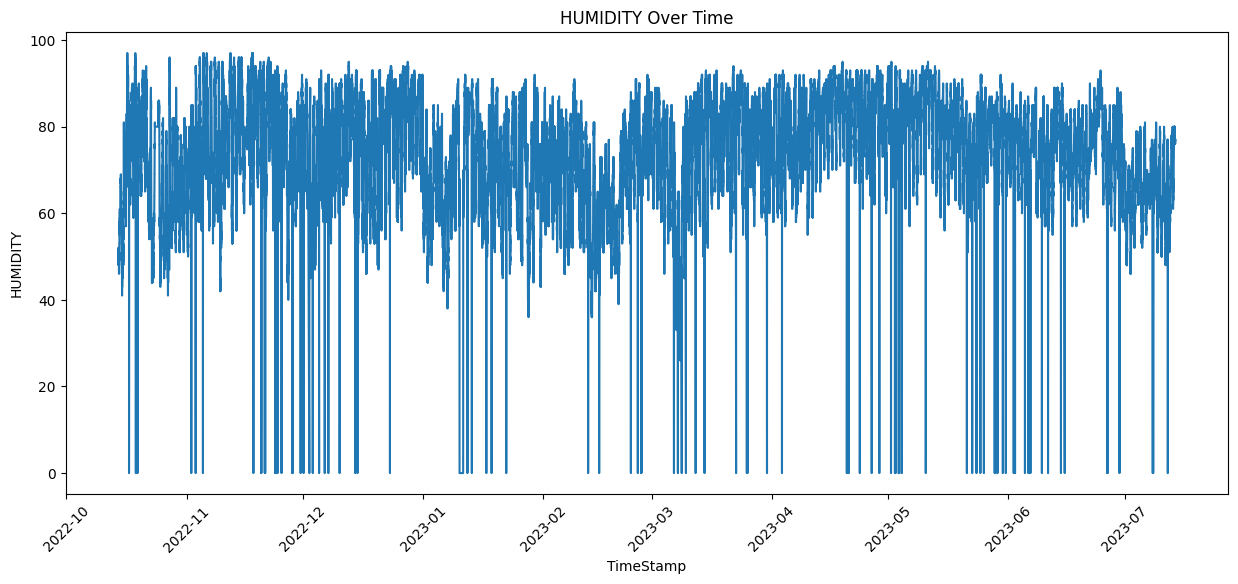

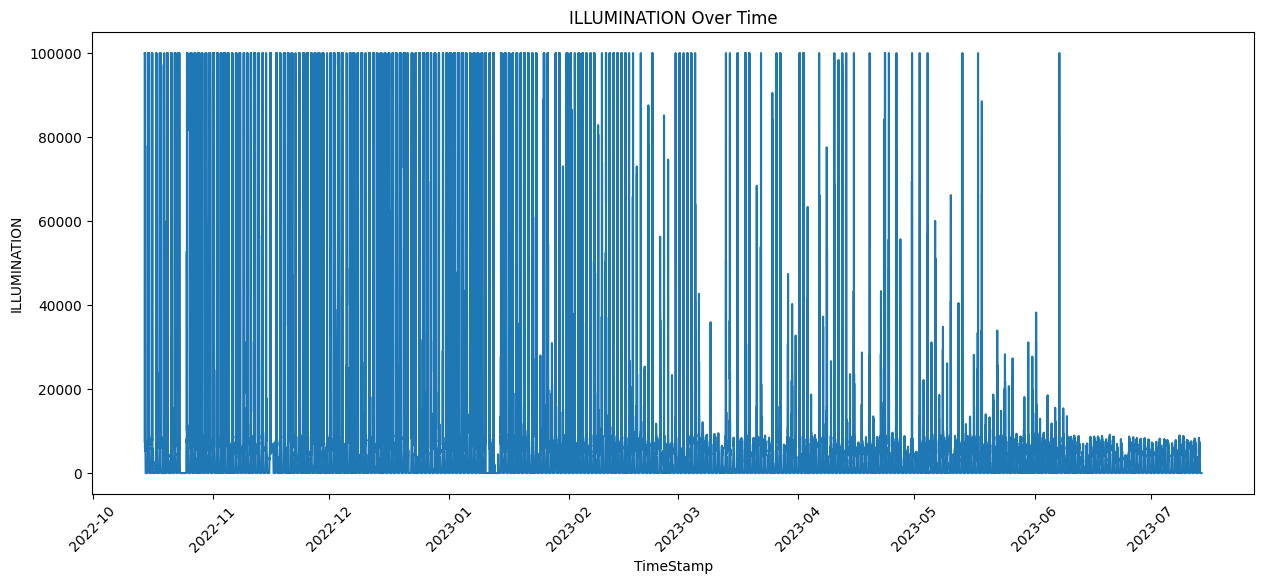

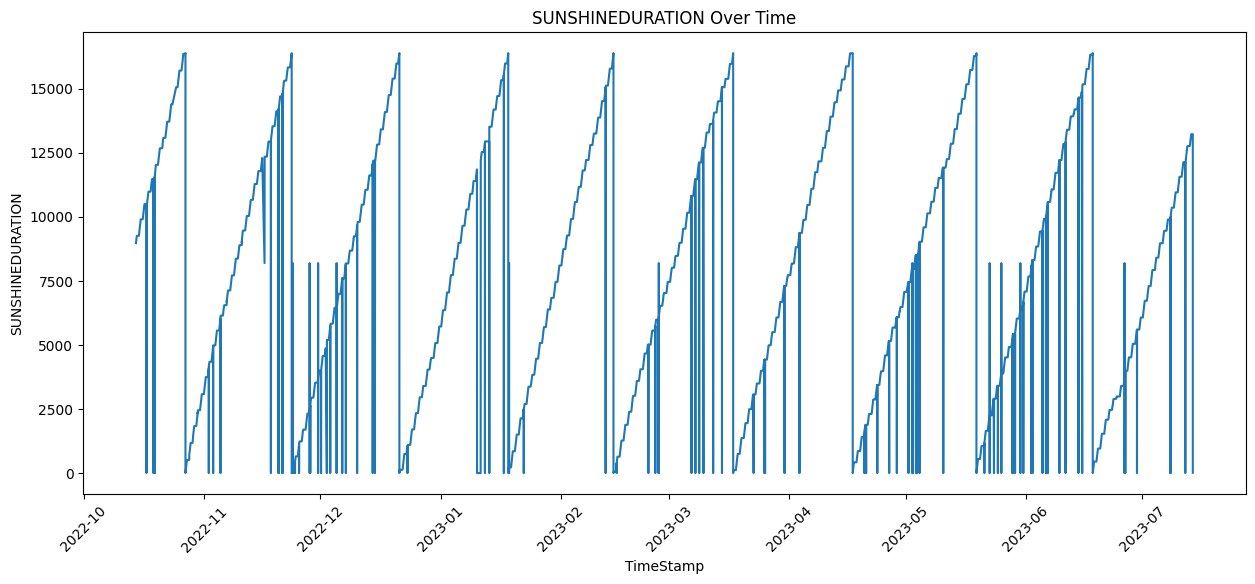

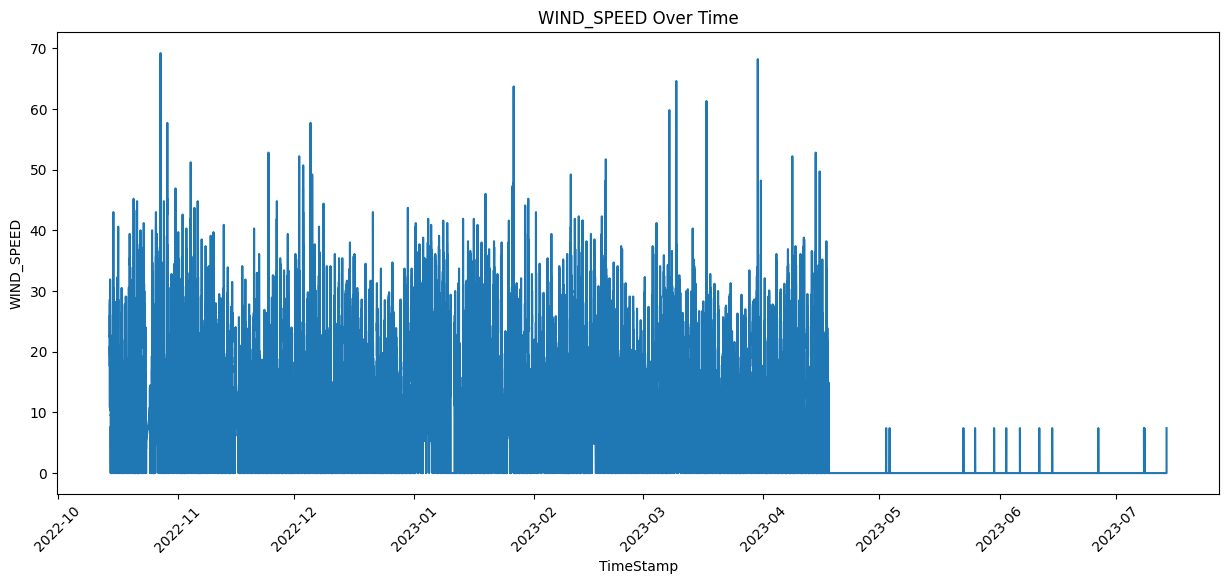

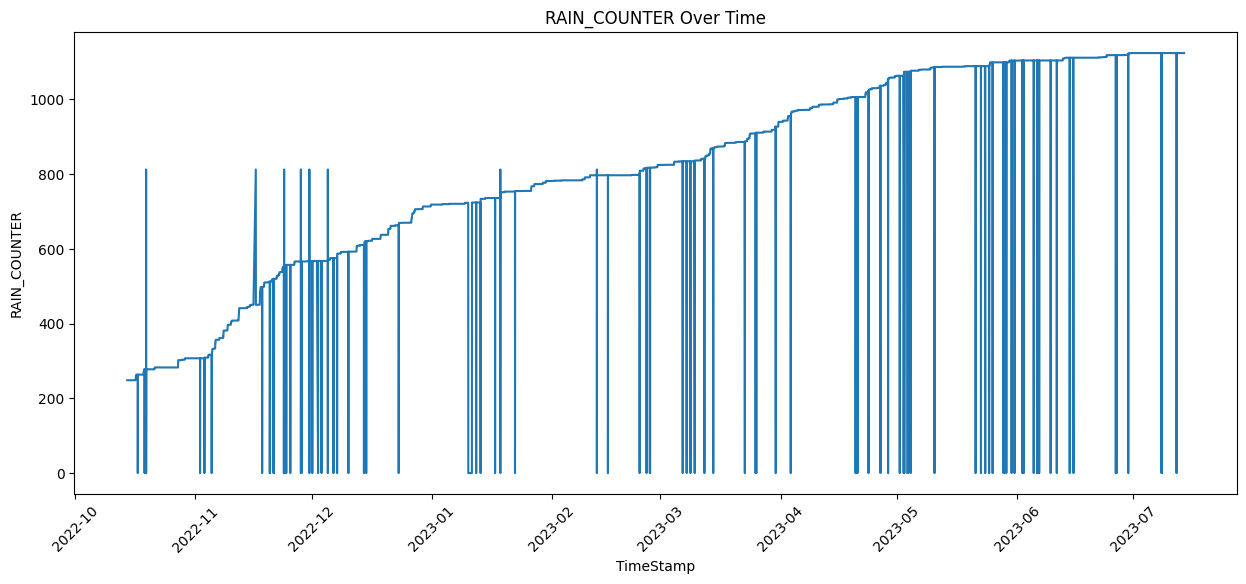

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'TimeStamp' is in datetime format
continuous_features = ['ACTUAL_TEMPERATURE', 'HUMIDITY', 'ILLUMINATION', 'SUNSHINEDURATION', 'WIND_SPEED', 'RAIN_COUNTER']

for feature in continuous_features:
    plt.figure(figsize=(7, 5))
    sns.lineplot(data=df, x='TimeStamp', y=feature)
    plt.xlabel('TimeStamp')
    plt.ylabel(feature)
    plt.title(f'{feature} Over Time')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()


In [34]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (Y)
X = df.drop(["RAIN_COUNTER"], axis=1)  # Exclude Precipitation
Y = df["RAIN_COUNTER"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
y_train

2895    0
1818    0
2321    1
402     1
1262    0
       ..
763     0
835     2
1653    0
2607    6
2732    1
Name: Precipitation, Length: 2260, dtype: int64

In [35]:
# Output column names
df.columns


Index(['TimeStamp', 'TimeStamp.1', 'Date', 'Time', 'Ticks',
       'ACTUAL_TEMPERATURE', 'HUMIDITY', 'ILLUMINATION', 'RAIN_COUNTER',
       'SUNSHINEDURATION', 'WIND_SPEED'],
      dtype='object')

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your original DataFrame
features = ['Ticks', 'ACTUAL_TEMPERATURE', 'HUMIDITY', 'ILLUMINATION', 'SUNSHINEDURATION', 'WIND_SPEED']
target = 'RAIN_COUNTER'

# Extract features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'DateTime': df.loc[X_test.index, 'DateTime'],  # Assuming 'DateTime' is the correct timestamp column
    'Actual_Rainfall': y_test,
    'Predicted_Rainfall': y_pred
})

# Concatenate with other specified features
results_df = pd.concat([results_df, df.loc[X_test.index, features]], axis=1)




Mean Squared Error: 2185.5171559514497


In [77]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


R-squared: 0.9677737178747647


In [80]:
print(results_df.columns)


Index(['DateTime', 'Actual_Rainfall', 'Predicted_Rainfall', 'Ticks',
       'ACTUAL_TEMPERATURE', 'HUMIDITY', 'ILLUMINATION', 'SUNSHINEDURATION',
       'WIND_SPEED'],
      dtype='object')


In [81]:
# Assume df is your DataFrame and the last row corresponds to the most recent timestamp
features_for_tomorrow = df[features].iloc[[-1]]  # Extract the features of the last row

# Use the trained model to make predictions
rainfall_prediction_tomorrow = rf_model.predict(features_for_tomorrow)

print(f'Predicted Rainfall for Tomorrow: {rainfall_prediction_tomorrow[0]}')


Predicted Rainfall for Tomorrow: 861.6379999999991


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame
features = ['Ticks', 'ACTUAL_TEMPERATURE', 'HUMIDITY', 'ILLUMINATION', 'SUNSHINEDURATION', 'WIND_SPEED']
target = 'RAIN_COUNTER'

# Extract features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Assume 'df' contains your historical data
# Extract features for the next week (replace this with your actual data)
features_for_next_week = pd.DataFrame({
    'Ticks': [1234567890],
    'ACTUAL_TEMPERATURE': [25.0],
    'HUMIDITY': [90],
    'ILLUMINATION': [10000],
    'SUNSHINEDURATION': [50],
    'WIND_SPEED': [0]
})

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies as well
features_for_next_week_imputed = pd.DataFrame(imputer.fit_transform(features_for_next_week),
                                               columns=features_for_next_week.columns,
                                               index=features_for_next_week.index)

# Use the trained model to predict rainfall for the next week
predicted_rainfall_for_next_week = rf_model.predict(features_for_next_week_imputed)

# Create a DataFrame to display the results
results_for_next_week = pd.DataFrame({
    'Predicted_Rainfall_for_nextweek': predicted_rainfall_for_next_week
})

# Display the predicted rainfall for the next week
print(results_for_next_week)


Mean Squared Error: 2185.5171559514497
   Predicted_Rainfall_for_nextweek
0                          954.658


In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming 'df' is your DataFrame
features = ['Ticks', 'ACTUAL_TEMPERATURE', 'HUMIDITY', 'ILLUMINATION', 'SUNSHINEDURATION', 'WIND_SPEED']
target = 'RAIN_COUNTER'

# Set the threshold for rain occurrence
threshold_for_rain = df[target].median()

# Extract features (X) and target variable (y)
X = df[features]
y = (df[target] > threshold_for_rain).astype(int)  # Convert to binary (1 for rain, 0 for no rain)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nAccuracy Score:', accuracy_score(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[19015   319]
 [  322 19081]]

Accuracy Score: 0.9834525131011694

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19334
           1       0.98      0.98      0.98     19403

    accuracy                           0.98     38737
   macro avg       0.98      0.98      0.98     38737
weighted avg       0.98      0.98      0.98     38737



In [91]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are your true labels and predicted labels
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19334
           1       0.98      0.98      0.98     19403

    accuracy                           0.98     38737
   macro avg       0.98      0.98      0.98     38737
weighted avg       0.98      0.98      0.98     38737



Weighted Average Precision: 0.9834525292651962
Weighted Average Recall: 0.9834525131011694
Weighted Average F1-Score: 0.983452515284636


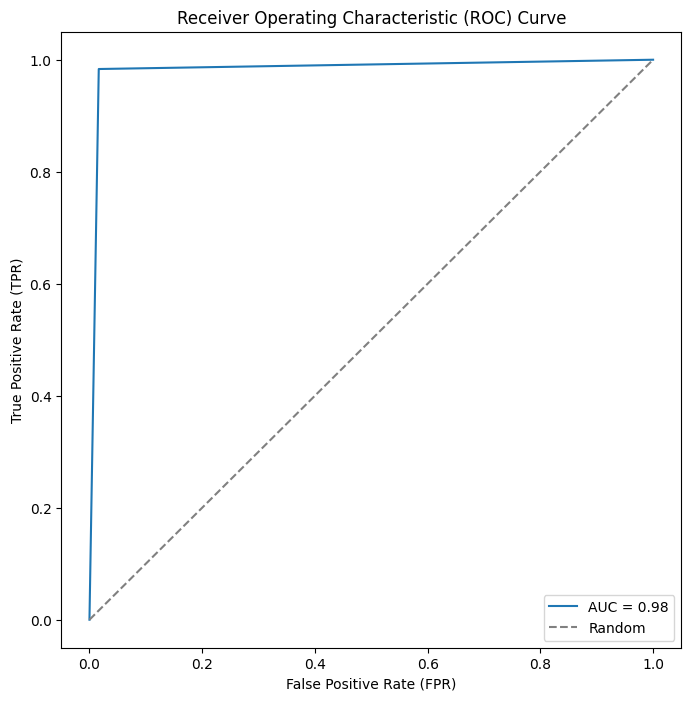

In [94]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming y_test and y_pred1 are your true labels and predicted labels
auc = roc_auc_score(y_test, y_pred)

# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()
